In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import nltk

In [20]:
raw_data=pd.read_csv('Yelp.csv')
raw_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [21]:
data_1=raw_data.copy()

In [22]:
data_1.columns

Index(['business_id', 'date', 'review_id', 'stars', 'text', 'type', 'user_id',
       'cool', 'useful', 'funny'],
      dtype='object')

In [23]:
data_1=data_1.drop(['type'],axis=1)
data_1.head()

,business_id,date,review_id,stars,text,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


#### Add Length column

In [24]:
data_2=data_1.copy()

In [25]:
data_2['length']=data_2['text'].apply(len)

In [26]:
data_2.head()

,business_id,date,review_id,stars,text,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Data exploration

#### FacetGrid

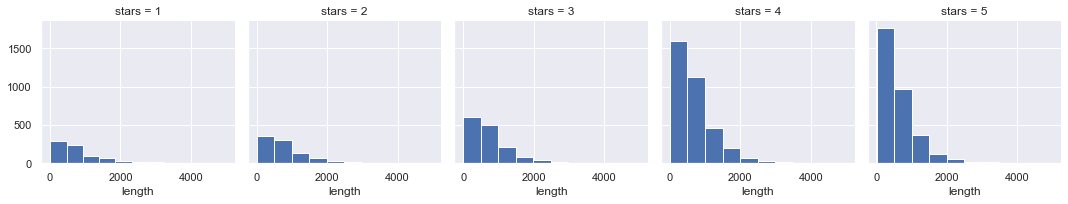

In [27]:
g=sns.FacetGrid(data=data_2,col='stars')
g.map(plt.hist,'length')

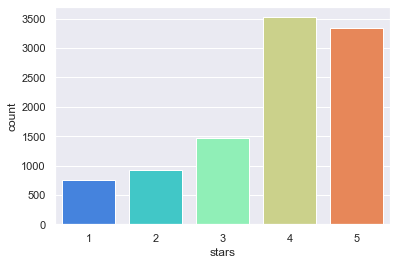

In [28]:
sns.countplot(x='stars',data=data_2,palette='rainbow')

In [29]:
data_2.corr()

,stars,cool,useful,funny,length
stars,1.000000,0.052555,-0.023479,-0.061306,-0.114674
cool,0.052555,1.000000,0.887102,0.764342,0.241451
useful,-0.023479,0.887102,1.000000,0.723406,0.293975
funny,-0.061306,0.764342,0.723406,1.000000,0.251760
length,-0.114674,0.241451,0.293975,0.251760,1.000000


## Tokenising

### Remove stopwords by using nltk.corpus

In [30]:
from nltk.corpus import stopwords

In [31]:
import string

In [39]:
text_remove_punc=[c for c in data_2['text'] if c not in string.punctuation]

In [40]:
text_remove_punc=''.join(text_remove_punc)

In [42]:
text_remove_punc.split()

['My',
 'wife',
 'took',
 'me',
 'here',
 'on',
 'my',
 'birthday',
 'for',
 'breakfast',
 'and',
 'it',
 'was',
 'excellent.',
 'The',
 'weather',
 'was',
 'perfect',
 'which',
 'made',
 'sitting',
 'outside',
 'overlooking',
 'their',
 'grounds',
 'an',
 'absolute',
 'pleasure.',
 'Our',
 'waitress',
 'was',
 'excellent',
 'and',
 'our',
 'food',
 'arrived',
 'quickly',
 'on',
 'the',
 'semi-busy',
 'Saturday',
 'morning.',
 'It',
 'looked',
 'like',
 'the',
 'place',
 'fills',
 'up',
 'pretty',
 'quickly',
 'so',
 'the',
 'earlier',
 'you',
 'get',
 'here',
 'the',
 'better.',
 'Do',
 'yourself',
 'a',
 'favor',
 'and',
 'get',
 'their',
 'Bloody',
 'Mary.',
 'It',
 'was',
 'phenomenal',
 'and',
 'simply',
 'the',
 'best',
 "I've",
 'ever',
 'had.',
 "I'm",
 'pretty',
 'sure',
 'they',
 'only',
 'use',
 'ingredients',
 'from',
 'their',
 'garden',
 'and',
 'blend',
 'them',
 'fresh',
 'when',
 'you',
 'order',
 'it.',
 'It',
 'was',
 'amazing.',
 'While',
 'EVERYTHING',
 'on',
 'the

In [45]:
text_remove_stopwords=[word for word in text_remove_punc.split() if word.lower() not in
                      stopwords.words('english')]

In [46]:
data_2['text'].head(5)

0    My wife took me here on my birthday for breakf...
1    I have no idea why some people give bad review...
2    love the gyro plate. Rice is so good and I als...
3    Rosie, Dakota, and I LOVE Chaparral Dog Park!!...
4    General Manager Scott Petello is a good egg!!!...
Name: text, dtype: object

### Using pipeline for Vectorizing, TF IDF & classification

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

In [51]:
from sklearn.feature_extraction.text import TfidfTransformer

In [49]:
from sklearn.svm import SVC

In [48]:
from sklearn.pipeline import Pipeline

In [52]:
pipeline=Pipeline([
    ('vectorise', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
y=data_2['stars']
x=data_2['text']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=101)

In [55]:
pipeline.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('vectorise',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('tfidf',
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr

In [56]:
class_pred=pipeline.predict(x_test)

In [57]:
from sklearn.metrics import classification_report,confusion_matrix

In [58]:
print(classification_report(y_test,class_pred))
print(confusion_matrix(y_test,class_pred))

              precision    recall  f1-score   support

           1       0.69      0.41      0.51       145
           2       0.57      0.22      0.32       178
           3       0.51      0.20      0.29       303
           4       0.48      0.68      0.56       713
           5       0.62      0.66      0.64       661

    accuracy                           0.54      2000
   macro avg       0.57      0.43      0.46      2000
weighted avg       0.55      0.54      0.52      2000

[[ 59  17   4  41  24]
 [ 17  40  33  74  14]
 [  7   8  60 202  26]
 [  2   3  17 488 203]
 [  0   2   4 221 434]]
